In [153]:
import numpy as np
import matplotlib.pyplot as plt
import sys

%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [154]:
sampling_frequency = 200
sampling_interval = 1/sampling_frequency

start = 0
end = 3

signal1_frequency = 7
signal2_frequency = 11

time = np.arange(start, end, sampling_interval)

In [155]:
def square_wave(time, frequency):
    sine = np.sin(2*np.pi*frequency*time)
    return np.sign(sine)

In [156]:
signal1 = np.sin(2*np.pi*signal1_frequency*time)
signal2 = np.sin(2*np.pi*signal2_frequency*time)
signal3 = square_wave(time, 9)
print(len(signal3))
signal = signal1 + signal2 + signal3

600


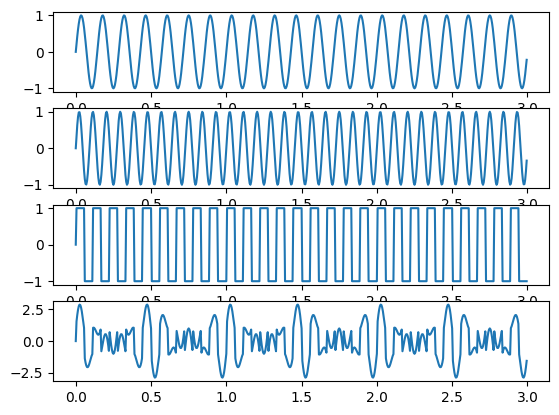

In [157]:
fig, axs = plt.subplots(4, 1)
axs[0].plot(time, signal1)
axs[1].plot(time, signal2)
axs[2].plot(time, signal3)
axs[3].plot(time, signal)

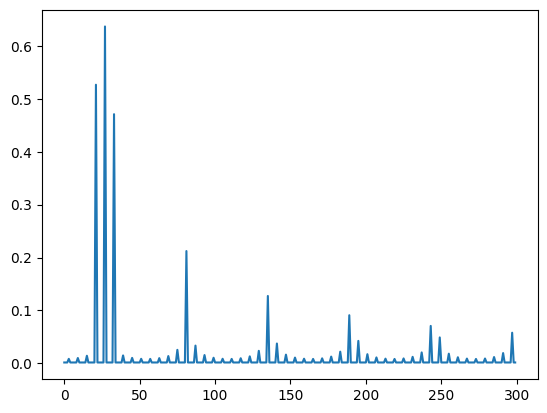

In [158]:
FT = np.fft.fft(signal)/len(signal)
FT = FT[range(int(len(signal)/2))]
plt.plot(abs(FT))

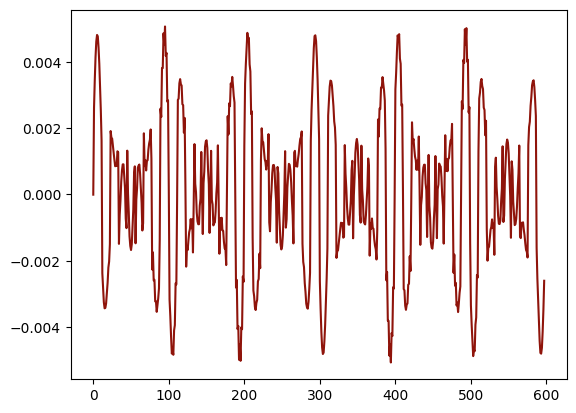

In [159]:
inverseFT = np.fft.irfft(FT)
plt.plot(inverseFT, color="#8f140b")

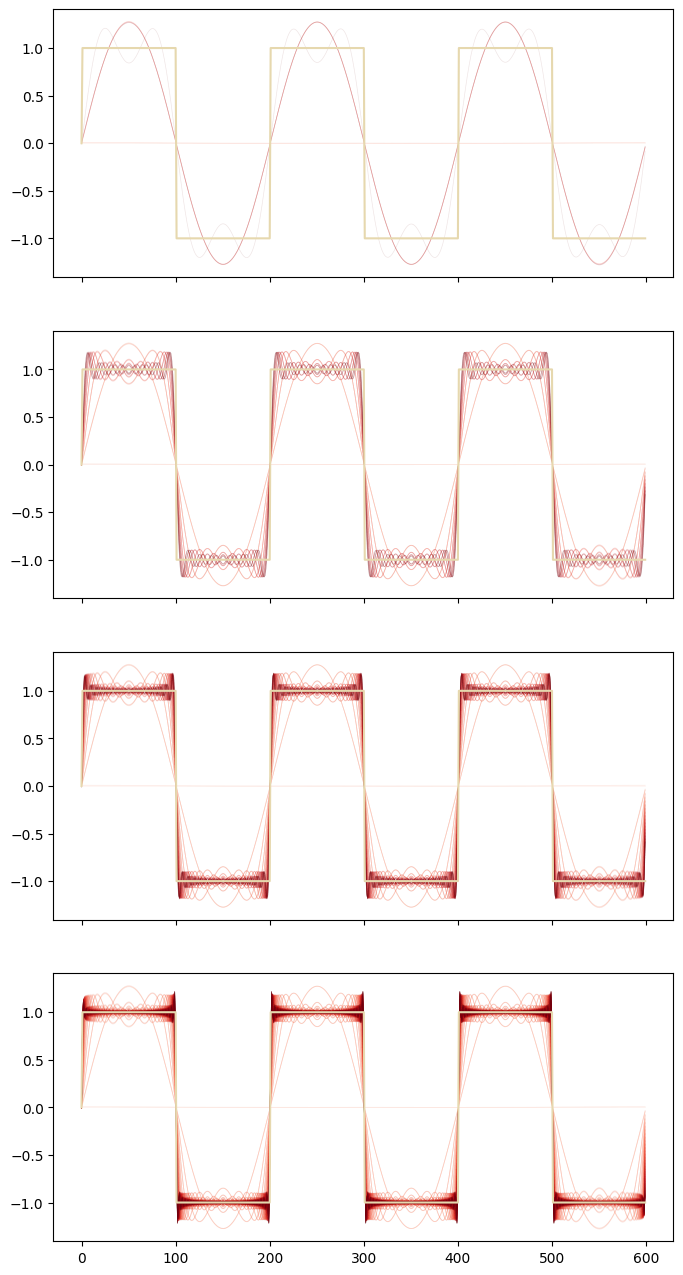

In [182]:
def fourierSeries(signal, components):
    plot_size = 8
    fig, axs = plt.subplots(len(components), 1, figsize=(plot_size, 2*plot_size), sharex=True, sharey=True)

    j = 0
    for n in components:
        colors = np.linspace(100, 255, n)
        for i in range(n):
            fft = np.fft.rfft(signal)
            np.put(fft, range(i+1, len(fft)), 0.0)
            ifft = np.fft.irfft(fft)
            axs[j].plot(ifft, color=plt.cm.Reds(int(colors[i])), alpha = .1, linewidth=0.5)

        axs[j].plot(signal, color="#e6d8ae")
        j -=- 1

binary_signal = square_wave(time, 1)
fourierSeries(binary_signal, [10, 50, 100, 200])